<a href="https://colab.research.google.com/github/bbachonko/pytorch-MF-NeuMF/blob/main/MF_vs_NeuMF_%7C_Recc_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TO-DOs:
- ujednolicic rozne wyadnia ksiazek (sprawdicz czy w gole to konieczne, czy w danych juz jest unilnay id)

In [1]:
import kagglehub
import os
import shutil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Loading `goodbooks-10k` dataset from kaggle via kagglehub

In [2]:
src_path = kagglehub.dataset_download("zygmunt/goodbooks-10k")
dst_path = os.path.join(os.getcwd(), "goodbooks-10k")
shutil.copytree(src_path, dst_path, dirs_exist_ok=True)

print(f"Dataset copied to: {dst_path}")

Dataset copied to: /content/goodbooks-10k


# Wstępna analiza danych

In [3]:
books_df = pd.read_csv("goodbooks-10k/books.csv")
book_tags_df = pd.read_csv("goodbooks-10k/book_tags.csv")
tags_df = pd.read_csv("goodbooks-10k/tags.csv")
ratings_df = pd.read_csv("goodbooks-10k/ratings.csv")
to_read_df = pd.read_csv("goodbooks-10k/to_read.csv")

## Books dataframe

In [ ]:
books_df.convert_dtypes().info()  # Casting to best possible data type
books_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  Int64  
 1   book_id                    10000 non-null  Int64  
 2   best_book_id               10000 non-null  Int64  
 3   work_id                    10000 non-null  Int64  
 4   books_count                10000 non-null  Int64  
 5   isbn                       9300 non-null   string 
 6   isbn13                     9415 non-null   Int64  
 7   authors                    10000 non-null  string 
 8   original_publication_year  9979 non-null   Int64  
 9   original_title             9415 non-null   string 
 10  title                      10000 non-null  string 
 11  language_code              8916 non-null   string 
 12  average_rating             10000 non-null  Float64
 13  ratings_count              10000 non-null  Int6

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


### Opis pól

| Nazwa kolumny              | Typ danych | Opis                                                                                  |
|----------------------------|------------|---------------------------------------------------------------------------------------|
| `book_id`                  | int        | Unikalny identyfikator książki w zestawie danych.                                    |
| `best_book_id`             | int        | Identyfikator najpopularniejszego wydania książki.                                   |
| `work_id`                  | int        | Identyfikator dzieła (grupuje różne wydania tej samej książki).                      |
| `books_count`              | int        | Liczba różnych wydań książki.                                                        |
| `isbn`                     | string     | Numer ISBN książki (może być pusty).                                                 |
| `isbn13`                   | string     | Numer ISBN-13 książki (może być pusty).                                              |
| `authors`                  | string     | Imię i nazwisko autora lub autorów książki.                                          |
| `original_publication_year`| float      | Rok pierwszego wydania książki (może być pusty).                                     |
| `original_title`           | string     | Oryginalny tytuł książki (może być pusty).                                           |
| `title`                    | string     | Tytuł książki.                                                                       |
| `language_code`            | string     | Kod języka książki (np. 'en' dla angielskiego).                                      |
| `average_rating`           | float      | Średnia ocena książki nadana przez użytkowników.                                     |
| `ratings_count`            | int        | Liczba ocen, które książka otrzymała.                                                |
| `work_ratings_count`       | int        | Łączna liczba ocen dla wszystkich wydań danego dzieła.                               |
| `work_text_reviews_count`  | int        | Łączna liczba recenzji tekstowych dla wszystkich wydań danego dzieła.               |
| `ratings_1`                | int        | Liczba ocen z 1 gwiazdką.                                                            |
| `ratings_2`                | int        | Liczba ocen z 2 gwiazdkami.                                                          |
| `ratings_3`                | int        | Liczba ocen z 3 gwiazdkami.                                                          |
| `ratings_4`                | int        | Liczba ocen z 4 gwiazdkami.                                                          |
| `ratings_5`                | int        | Liczba ocen z 5 gwiazdkami.                                                          |
| `image_url`                | string     | URL do okładki książki.                                                              |
| `small_image_url`          | string     | URL do małej wersji okładki książki.                                                 |

W tym zbiorze dostepne sa dość generyczne informacje o ksiazkach. Jest rozorznienie na wiele wydan ksiazki, podstawowe infoemacje jak np. tytuł oraz zliczenie ilości danej oceny ksiązki.

## Book tags

In [ ]:
book_tags_df.convert_dtypes().info()
book_tags_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  Int64
 1   tag_id             999912 non-null  Int64
 2   count              999912 non-null  Int64
dtypes: Int64(3)
memory usage: 25.7 MB


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


### Opis pól

| Nazwa kolumny       | Typ danych | Opis                                                                                      |
|---------------------|------------|-------------------------------------------------------------------------------------------|
| `goodreads_book_id` | int        | Unikalny identyfikator książki w serwisie Goodreads.                                      |
| `tag_id`            | int        | Identyfikator tagu przypisanego do książki.                                               |
| `count`             | int        | Liczba użytkowników, którzy przypisali dany tag do książki.                               |

Ten zbior danych zawiera przyporzadkowanie tagów do ksiazek. Sam w sobie nie jest zbyt informatywny. Wlasciwosci konkretnych tagow beda opisane w zbiorze `tags.csv`.

## Tags dataframe

In [ ]:
tags_df.convert_dtypes().info()
tags_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  Int64 
 1   tag_name  34252 non-null  string
dtypes: Int64(1), string(1)
memory usage: 568.8 KB


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
5,5,--166-
6,6,--17-
7,7,--19-
8,8,--2-
9,9,--258-


### Opis kolumn

| Nazwa kolumny | Typ danych | Opis                                                        |
|---------------|------------|-------------------------------------------------------------|
| `tag_id`      | int        | Unikalny identyfikator tagu (służy jako klucz obcy w `book_tags.csv`). |
| `tag_name`    | string     | Nazwa tagu przypisanego przez użytkowników (np. 'fantasy', 'science'). |


## Ratings dataframe

In [ ]:
ratings_df.convert_dtypes().info()
ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  Int64
 1   user_id  981756 non-null  Int64
 2   rating   981756 non-null  Int64
dtypes: Int64(3)
memory usage: 25.3 MB


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


### Opis kolumn

| Nazwa kolumny | Typ danych | Opis                                                                                   |
|---------------|------------|----------------------------------------------------------------------------------------|
| `user_id`     | int        | Unikalny identyfikator użytkownika.                                                    |
| `book_id`     | int        | Identyfikator książki (odnosi się do `work_id` w `books.csv`).                         |
| `rating`      | int        | Ocena przyznana przez użytkownika książce (wartości od 1 do 5).                         |


## to_read dataframe

In [ ]:
to_read_df.convert_dtypes().info()
to_read_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  Int64
 1   book_id  912705 non-null  Int64
dtypes: Int64(2)
memory usage: 15.7 MB


,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


### Opis pól

| Nazwa kolumny | Typ danych | Opis                                                                                   |
|---------------|------------|----------------------------------------------------------------------------------------|
| `user_id`     | int        | Unikalny identyfikator użytkownika.                                                    |
| `book_id`     | int        | Identyfikator książki (odnosi się do `work_id` w `books.csv`).                         |


# Możliwe podejścia do modelowania systemu rekomendacji

Zestaw danych **Goodbooks-10k** zawiera różnorodne informacje, które umożliwiają zastosowanie kilku odmiennych podejść do budowy systemu rekomendacyjnego. W zależności od wybranych danych wejściowych i celu projektu, możliwe są m.in. następujące strategie:

---

#### 1. 📊 Collaborative Filtering (Filtracja współdzielona)

To podejście opiera się wyłącznie na danych o interakcjach użytkowników z książkami — głównie ocenach. Zakłada się, że użytkownicy o podobnych gustach będą wysoko oceniać podobne książki.

- **Źródło danych:** `ratings.csv`
- **Wejście do modelu:** macierz użytkownik–książka z ocenami
- **Możliwe modele:** macierz faktoryzacji, autoenkodery, modele sekwencyjne (dla historii ocen)

---

#### 2. 📚 Content-Based Filtering (Filtracja oparta na zawartości)

W tym podejściu każda książka opisywana jest na podstawie swoich cech: metadanych i tagów. Rekomendacje są generowane w oparciu o podobieństwo między książkami, które użytkownik już ocenił, a pozostałymi pozycjami.

- **Źródło danych:** `books.csv`, `book_tags.csv`, `tags.csv`
- **Wejście do modelu:** reprezentacje cech książek (np. gatunek, autor, tagi)
- **Zalety:** skuteczne dla nowych książek bez ocen (problem "cold start" dla itemów)

---

#### 3. 🧠 Multi-Hot / Tag-Based Embedding

To podejście zakłada zakodowanie tagów przypisanych do książek jako wektorów binarnych (`multi-hot`) lub embeddingów i wykorzystanie ich jako wejścia do modelu predykcyjnego (np. sieci neuronowej).

- **Źródło danych:** `book_tags.csv`, `tags.csv`
- **Wejście do modelu:** wektory wielotagowe (`multi-hot`) lub embeddingi tagów
- **Zastosowanie:** klasyfikacja binarna (czy użytkownik polubi książkę), regresja ocen, ranking

---

#### 🔄 Podejście hybrydowe

Możliwe jest również połączenie powyższych metod — np. poprzez stworzenie modelu głębokiego uczącego się zarówno z ocen użytkowników, jak i cech książek. Taki **hybrydowy system rekomendacyjny** może łączyć najlepsze cechy filtracji współdzielonej i podejścia content-based.

---

Każde z podejść może być wykorzystane zależnie od dostępności danych, oczekiwanej dokładności oraz ograniczeń systemowych (np. wydajność, skalowalność). W niniejszej pracy omówiono konkretne zastosowanie wybranego podejścia z wykorzystaniem danych z Goodbooks-10k.



### Wybrane podejście

Celem zadania jest budowa dwóch modeli rekomendacyjnych:  
1. modelu opartego na klasycznym podejściu,  
2. oraz modelu wykorzystującego głębokie uczenie.  

W związku z tym konieczne jest zastosowanie architektury, która:
- posiada swoje odpowiedniki zarówno w metodach tradycyjnych, jak i w głębokim uczeniu,
- oraz umożliwia uwzględnienie dodatkowych metadanych dostępnych dla książek.

Idealnym rozwiązaniem spełniającym te kryteria jest zastosowanie pary modeli:  
**Matrix Factorization (MF)** w roli podejścia klasycznego oraz **Neural Matrix Factorization (NeuMF)** jako jego głębokiej wersji.

Oba modele bazują na idei faktoryzacji macierzy użytkownik–przedmiot, jednak NeuMF, dzięki zastosowaniu warstw neuronowych i embeddingów, pozwala dodatkowo uwzględniać informacje kontekstowe, takie jak cechy książek (np. tagi, autor, rok wydania), co czyni go bardziej elastycznym i potencjalnie skuteczniejszym w praktycznych zastosowaniach.


# Właściwa analiza

Przed rozpoczeniem modelowania konieczne jest lepsze poznanie danych, dlatego tez w koljenych działach zamieszczone zostały kroki, któe beda mialy na celu lepsze rozneznaie się w charaketerstyce danych oraz możliwych wyzwan, które mogą nieść.


## Rozkład ocen (ratings.csv)

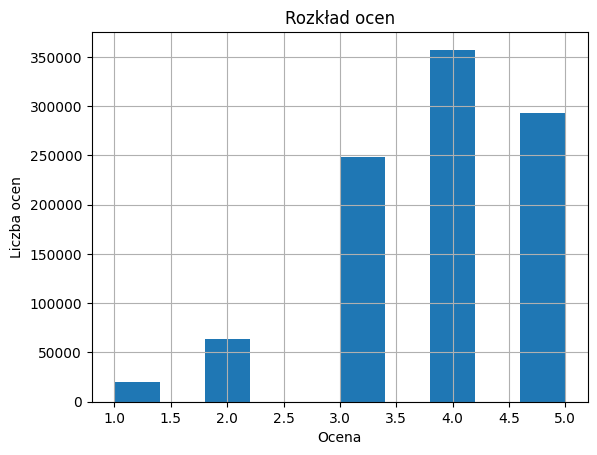

In [ ]:
plt.hist(ratings_df["rating"], )
plt.xlabel("Ocena")
plt.ylabel("Liczba ocen")
plt.title("Rozkład ocen")
plt.grid(True)
plt.show()

Wiekszosc uzytkownikow, ktora oddala ocene maja dobre opinie, co moze sugerowac, ze uzytkownicy oceniajacy ksiazki negatywnie sa mniej chętni do wystawiania ocen.

In [ ]:
print(ratings_df["rating"].describe())
print(f"Mediana ocen {ratings_df['rating'].median()}")

count    981756.000000
mean          3.856534
std           0.983941
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64
Mediana ocen 4.0


### Oceny per uzytkownik

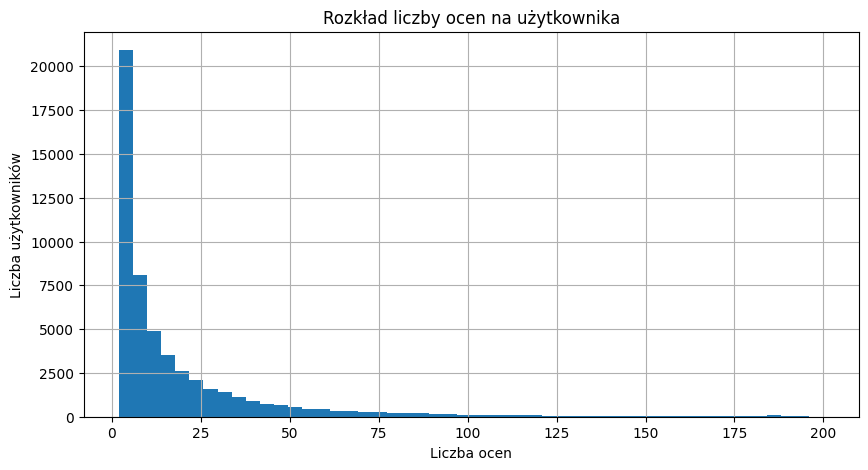

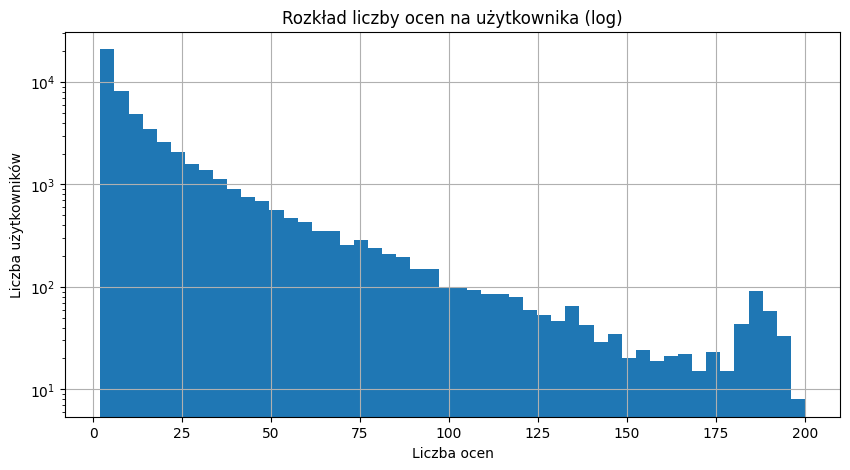

In [ ]:
ratings_per_user = ratings_df.groupby("user_id")["rating"].count()

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_user, bins=50)
plt.title("Rozkład liczby ocen na użytkownika")
plt.xlabel("Liczba ocen")
plt.ylabel("Liczba użytkowników")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_user, bins=50, log=True)
plt.title("Rozkład liczby ocen na użytkownika (log)")
plt.xlabel("Liczba ocen")
plt.ylabel("Liczba użytkowników")
plt.grid(True)
plt.show()

In [ ]:
# Ratings per user >= 4
ratings_per_user[ratings_per_user >= 4].describe()

,rating
count,39686.000000
mean,23.908784
std,28.457381
min,4.000000
25%,7.000000
50%,13.000000
75%,29.000000
max,200.000000


### Oceny per ksiazka

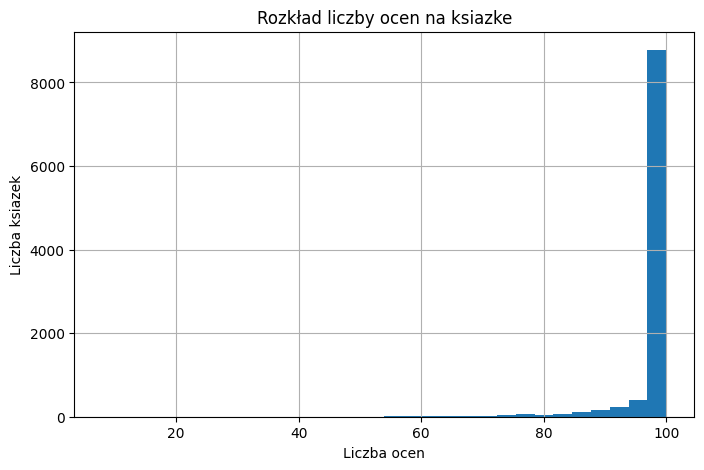

In [ ]:
ratings_per_book = ratings_df.groupby("book_id")["rating"].count()

plt.figure(figsize=(8, 5))
plt.hist(ratings_per_book, bins=30)
plt.title("Rozkład liczby ocen na ksiazke")
plt.xlabel("Liczba ocen")
plt.ylabel("Liczba ksiazek")
plt.grid(True)
plt.show()

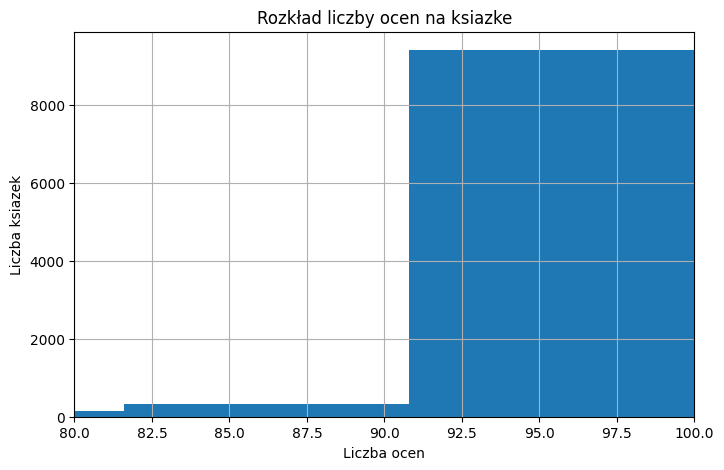

In [ ]:
# ograniczenie OX do wartosci 60-80
plt.figure(figsize=(8, 5))
plt.hist(ratings_per_book)
plt.title("Rozkład liczby ocen na ksiazke")
plt.xlabel("Liczba ocen")
plt.xlim(80, 100)
plt.ylabel("Liczba ksiazek")
plt.grid(True)
plt.show()

Przewazajaca czesc ksiazek ma liczbe ocen w przedziale 90-100. Wynika to najprawdopodobniej ze wstepnych zalozen jakie zostaly przyjete przy tworzeniu datsetu.

## Aktywnosc uzytkownikow

#### Ilosc uzytkownikow z dana ilsocia recencji

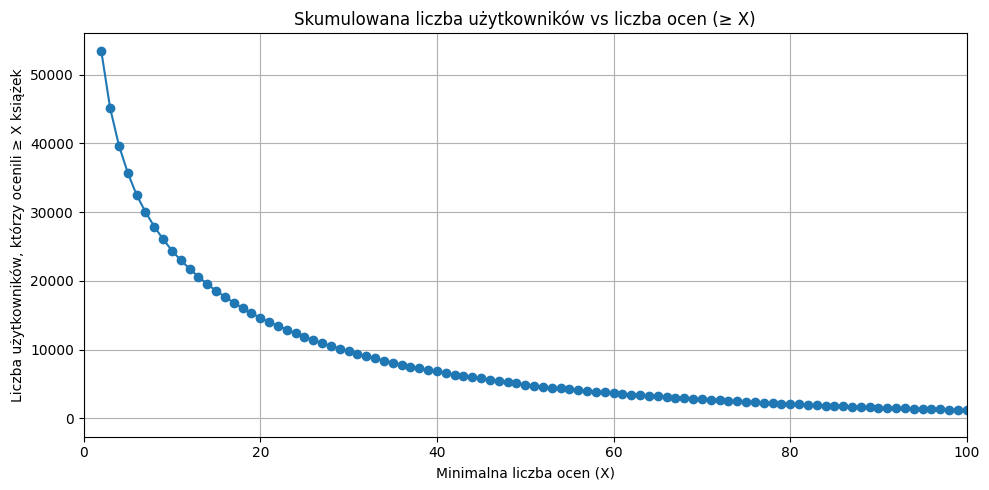

In [ ]:
# Unikalne liczby ocen, posortowane rosnąco
oceny_unikalne = sorted(ratings_per_user.unique())

# Liczenie: ilu użytkowników ma co najmniej X ocen
skumulowana_liczba_uzytkownikow = [ (ratings_per_user >= x).sum() for x in oceny_unikalne ]

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(oceny_unikalne, skumulowana_liczba_uzytkownikow, marker='o')
plt.title("Skumulowana liczba użytkowników vs liczba ocen (≥ X)")
plt.xlabel("Minimalna liczba ocen (X)")
plt.xlim(0, 100)
plt.ylabel("Liczba użytkowników, którzy ocenili ≥ X książek")
plt.grid(True)
plt.tight_layout()
plt.show()

Wykres ten tzw. wykres dystrybuanty odwrotnej (CCDF – Complementary Cumulative Distribution Function) pokazuje jaka jest liczba uzytkownikow, ktorzy wystawili minimlnaa ilosc ocen z zlaezosci od wartosci X. W przypadku uzycia sameog filtorwania kolaboratywengo wykres ten pokazuje sparsity danych, czyli jak wielu uzytkownikow ma wcale lub bardzo malo ocen. W tym przypadku liczby te wygladaja wystarczajaca (~15k uzytkownikow z 20 recenzjami) + model nie bedzie oparty tylko na wspozaleznoscia z innymi uzytkownikami.

## Popularność i pokrycie książek

In [ ]:
# Selecting most popular books in terms of ratings
most_popular_books = (
    ratings_df.groupby("book_id")["rating"]
    .count()
    .sort_values(ascending=False)
    .reset_index()
)

# joining with titles
most_popular_books = (
    books_df[["title", "authors", "book_id"]]
    .merge(most_popular_books, on="book_id")
)
most_popular_books.head(20)

,title,authors,book_id,rating
0,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",3,100
1,To Kill a Mockingbird,Harper Lee,2657,100
2,The Great Gatsby,F. Scott Fitzgerald,4671,100
3,The Hobbit,J.R.R. Tolkien,5907,100
4,The Catcher in the Rye,J.D. Salinger,5107,100
5,"Angels & Demons (Robert Langdon, #1)",Dan Brown,960,100
6,Pride and Prejudice,Jane Austen,1885,100
7,1984,"George Orwell, Erich Fromm, Celâl Üster",5470,100
8,Animal Farm,George Orwell,7613,100
9,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",5,100


In [ ]:
# checking distribution of number of ratings per book
ratings_per_user.describe(
    percentiles=np.arange(0, 1, 0.1,dtype=float)
).T


,rating
count,53424.000000
mean,18.376685
std,26.268690
min,2.000000
0%,2.000000
10%,2.000000
20%,3.000000
30%,4.000000
40%,6.000000
50%,8.000000


W zbiorze istnieja uzytjokwnicy ktorzy ocenili od 2 do 200 ksiazek. Często liczba uzytkownikow bez zadnej oceny o produkcie, ktroy jest rekomendowany jest przewawajaca. W tym wypadku jednak dane sa celowo juz wstepnie wyfiltrowane, w celu ulatwienia modelowania zaleznosci.

## Obliczenie sparsity macierzy user - book

$$
\text{Sparsity} = 1 - \frac{|\mathcal{R}|}{|U| \times |I|}
$$

\begin{aligned}
\text{gdzie:} \quad
& |\mathcal{R}| \quad \text{– liczba zaobserwowanych ocen (interakcji),} \\
& |U| \quad \text{– liczba unikalnych użytkowników,} \\
& |I| \quad \text{– liczba unikalnych książek (przedmiotów).}
\end{aligned}



In [ ]:
n_users = ratings_df['user_id'].nunique()
n_books = ratings_df['book_id'].nunique()
n_ratings = len(ratings_df)

sparsity = 1 - (n_ratings / (n_users * n_books))
print(f"Book - user interactions sparsity: {100 * sparsity:.2f}%")

Book - user interactions sparsity: 99.82%


Liczba ta mowi jak wiele recenzji mogło, ale nie zostalo wystawionych. Pomimo wczensiejszych analiz, gdzie bylo widac efekty filtrowania np. dla ilosci wystawionych recencji per ksiazke, wartosc ta odpowiada rzeczywistym przypadom. Oznacza to ze az ~99.8% mozliwych recenzji nie zostalo wystawionych.

# Analiza metadanych ksiazek - tagi

In [ ]:
merged_tags = pd.merge(book_tags_df, tags_df, on="tag_id")
tag_counts = (merged_tags
    .groupby("tag_name")["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print(tag_counts.head(10), "\n")
print(tag_counts.tail(10))

            tag_name      count
0            to-read  140718761
1  currently-reading    7507958
2          favorites    4503173
3            fiction    3688819
4            fantasy    3548157
5        young-adult    1848306
6           classics    1756920
7        books-i-own    1317235
8            romance    1231926
9              owned    1224279 

                      tag_name  count
34242                  0-boxed      1
34243   0-best-picture-younger      1
34244                   0-all2      1
34245  0-a-find-2016-summer-00      1
34246          0-4-star-rating      1
34247         0-0-0-0cant-find      1
34248             يلا-مش-مشكلة      1
34249           يتبعهم-الغاوون      1
34250       america-in-retreat     -1
34251           challenge-2013     -1


Tagi mowia duzo o samje ksiazkach. Zdecydowanie beda przydatne. Wyronizc jednak mozna tutaj kilka konteksotw ktore stoja za tagami. Sa to obiektywne informacje o ksiazce (np. gatunek) jak i subiektywen np. `to-read`.

Zbiór tagów wykorzystywany w zbiorze Goodbooks-10k zawiera zarówno obiektywne informacje (gatunki, tematyka), jak i subiektywne oznaczenia nadawane przez użytkowników (np. „to-read”, „favorites”). W kontekście uczenia reprezentacji (embeddingów) mieszanie tych kategorii może prowadzić do zafałszowania podobieństw semantycznych między książkami. Dlatego przed wykorzystaniem embeddingów przeprowadzono selekcję i filtrację tagów, pozostawiając jedynie te, które mają obiektywny, opisowy charakter.

Dlatego tez tagi zostana wyfiltrowane w konteksice gatunku, nie subiektywnych informacji.


In [ ]:
merged_tags["tag_name"].nunique()

34252

<Figure size 1200x600 with 0 Axes>

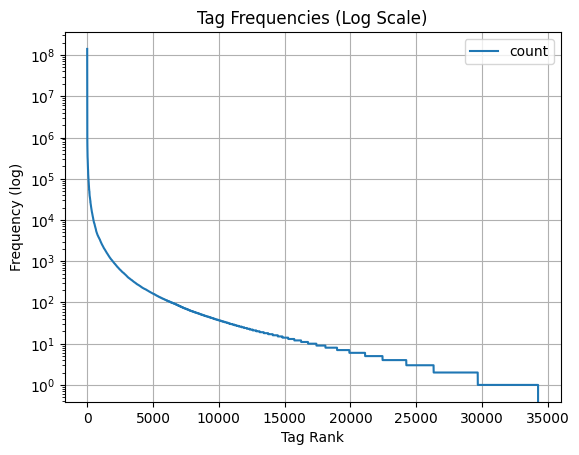

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
tag_counts.plot(logy=True)
plt.title("Tag Frequencies (Log Scale)")
plt.xlabel("Tag Rank (Based on occurence number)")
plt.ylabel("Frequency (log)")
plt.grid()


In [ ]:
# using eg. elbow method I can place cutoff on somewhere 2.5 - 5k neigbourhod, since here the slopeness degrades the most.
N_MOST_POPULAR_TAGS = 2500

most_popular_tags = tag_counts.nlargest(N_MOST_POPULAR_TAGS, "count")
most_popular_tags.head(10)

,tag_name,count
0,to-read,140718761
1,currently-reading,7507958
2,favorites,4503173
3,fiction,3688819
4,fantasy,3548157
5,young-adult,1848306
6,classics,1756920
7,books-i-own,1317235
8,romance,1231926
9,owned,1224279


Uniklanych tagow jest az 34k (book-10k). Oznacza to:
- ok. 10 000 książek,
- ok. 34 000 tagów (czyli ponad 3 razy więcej tagów niż itemów),

Co implikuje nastepujace potejclane problemy przy modelowaniu:
- wysoka redundancja (wiele tagów o zbliżonym znaczeniu),
- obecność szumu (błędy, literówki, bardzo osobiste lub jednorazowe tagi),
- długi ogon tagów (bardzo wiele z nich przypisanych do pojedynczych książek).

### Czyszcenie tagow + generalizacja:
1. Czyszczenie tagów
- Filtrowanie tagów na podstawie percentyli częstości (1–99%)
- Normalizacja (lowercase, lematyzacja, czyszczenie znaków)
- Usunięcie duplikatów

2. Uogólnianie znaczenia
- Obliczenie embeddingów tagów
- Klastrowanie semantyczne
- Mapowanie tagów na reprezentantów klastrów

3. Klasyfikacja
- Klasyfikacja tagów jako subiektywne / obiektywne (LLM)

4. Selekcja / wzmocnienie
Opcjonalne usunięcie subiektywnych tagów

Użycie tylko obiektywnych tagów jako cech modelu

Możliwe ważenie tagów lub regularizacja

### klasa TagProcessingPipeline

In [ ]:
!pip install langchain_openai
!pip install -qU langchain-openai
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.3/683.3 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.78.1
    Uninstalling openai-1.78.1:
      Successfully uninstalled openai-1.78.1


In [ ]:
"""
tag_classifier.py  ·  Structured-output version
================================================
Classifies free-form book tags into:
  • context  – objective | unclassified
  • genre    – canonical key or null
  • form     – canonical key or null

Key points
----------
* Uses response_format={"type": "json_schema", "schema": …}
* Returns **an array of objects** (simpler than dynamic keys).
* Schema-validated by the API, so no post-hoc cleaning.
* Few-shot examples in the prompt for better accuracy.
"""
import json
import os
from enum import Enum
from math import ceil
from typing import List, Optional

from openai import OpenAI
from pydantic import BaseModel, ValidationError
from google.colab import userdata

# ─────────────────────────── ENV & CLIENT ───────────────────────────
OPENAI_MODEL = "gpt-4o-mini"  # Most price reasonable and fastest
# os.environ["OPEANAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
# os.environ["OPENAI_API_KEY"] = ""

client = OpenAI()

# ─────────────────────────── ENUMS ───────────────────────────
class ContextType(str, Enum):
    OBJECTIVE = "objective"
    UNCLASSIFIED = "unclassified"


class GenreType(str, Enum):
    FANTASY = "fantasy"
    SCIENCE_FICTION = "science_fiction"
    ROMANCE = "romance"
    MYSTERY = "mystery"
    THRILLER = "thriller"
    HORROR = "horror"
    YOUNG_ADULT = "young_adult"
    CHILDRENS = "childrens"
    NONFICTION = "nonfiction"
    BIOGRAPHY = "biography"
    CLASSICS = "classics"
    HISTORY = "history"
    PHILOSOPHY = "philosophy"
    RELIGION = "religion"
    SCIENCE = "science"
    LGBTQ = "lgbtq"
    DIVERSITY = "diversity"
    SCHOOL = "school"
    OTHER = "other"


class FormType(str, Enum):
    POETRY = "poetry"
    SHORT_STORIES = "short_stories"
    GRAPHIC_NOVEL = "graphic_novel"
    ESSAY = "essay"
    DRAMA = "drama"
    COMIC = "comic"
    NOVELLA = "novella"
    WEBNOVEL = "webnovel"
    ANTHOLOGY = "anthology"
    OTHER = "other"


# ─────────────────────────── OUTPUT DATACLASS ───────────────────────────


class TagClassification(BaseModel):
    old_tag: str
    context: ContextType
    genre: Optional[GenreType] = None
    form: Optional[FormType] = None


# ─────────────────────────── JSON SCHEMA ───────────────────────────

GENRE_KEYS = [g.value for g in GenreType]
FORM_KEYS = [f.value for f in FormType]

CLASS_ARRAY_SCHEMA = {
    "type": "array",
    "items": {
        "type": "object",
        "properties": {
            "old_tag": {"type": "string"},
            "context": {"enum": [e.value for e in ContextType]},
            "genre": {"enum": GENRE_KEYS + [None]},
            "form": {"enum": FORM_KEYS + [None]},
        },
        "required": ["old_tag", "context", "genre", "form"],
        "additionalProperties": False,
    },
    "additionalItems": False,
}

WRAPPER_SCHEMA = {
    "type": "object",
    "properties": {
        "results": CLASS_ARRAY_SCHEMA
    },
    "required": ["results"],
    "additionalProperties": False,
}


# ─────────────────────────── FEW-SHOT EXAMPLES ───────────────────────────

FEW_SHOT = [
    {"old_tag": "science fiction", "context": "objective", "genre": "science_fiction", "form": None},
    {"old_tag": "graphic novel fantasy",  "context": "objective", "genre": "fantasy", "form": "graphic_novel"},
    {"old_tag": "poetry", "context": "objective", "genre": None, "form": "poetry"},
    {"old_tag": "lgbtq romance", "context": "objective", "genre": "lgbtq", "form": None},
    {"old_tag": "dnf", "context": "unclassified","genre": None, "form": None},
]
FEW_SHOT_BLOCK = json.dumps(FEW_SHOT, ensure_ascii=False, indent=2)

# ─────────────────────────── PROMPT TEMPLATE ───────────────────────────

PROMPT_TEMPLATE = """
You are a book-tag classification assistant.
Given a list of raw tags, return a **JSON array** of objects that
**validates** against the <schema>.  Each object must contain:

  1. old_tag  – original string
  2. context  – "objective" | "unclassified"
  3. genre    – key or null (see list)
  4. form     – key or null  (see list)

Allowed genre keys: {genres}
Allowed form  keys: {forms}

<schema>
{schema}
</schema>

<examples>
{examples}
</examples>

Classify these tags:
{tags_block}
""".strip()

# ─────────────────────────── HELPER: LLM CALL ───────────────────────────


def _ask_model(prompt: str) -> str:
    response = client.chat.completions.create(
        model=OPENAI_MODEL,
        messages=[
            {"role": "system", "content": "You are a book-tag classification assistant."},
            {"role": "user", "content": prompt},
        ],
        response_format={
            "type": "json_schema",
            "json_schema": {
                "name": "TagClassificationResponse",
                "schema": WRAPPER_SCHEMA,
                "strict": True,
            },
        },
        temperature=0,
    )
    return response.choices[0].message.content


from tqdm.auto import tqdm


def classify_tags(tags: List[str], batch_size: int = 250) -> List[TagClassification]:
    """Classify tags and return Pydantic models.

    TL;DR: Max batch_size for gpt4o-mini is 128k. 500 batch size is reasonable maximum.
    """
    results: List[TagClassification] = []
    for start in tqdm(range(0, len(tags), batch_size), desc="Tag batches"):
        batch = tags[start : start + batch_size]

        # Prompt prep
        prompt = PROMPT_TEMPLATE.format(
            genres=", ".join(GENRE_KEYS),
            forms=", ".join(FORM_KEYS),
            schema=json.dumps(WRAPPER_SCHEMA, indent=2),
            examples=FEW_SHOT_BLOCK,
            tags_block="\n".join(f"- {t}" for t in batch),
        )

        raw = _ask_model(prompt)
        payload = json.loads(raw)
        records = payload["results"]

        for rec in tqdm(records, desc="Records", leave=False):  # Pydantic instacne creation
            try:
                results.append(TagClassification(**rec))
            except ValidationError as err:
                raise ValueError(f"Invalid record returned: {rec}\n{err}") from err

    return results


### Uzycie LLMa w celu generalizacji tagow.

In [ ]:
# joining tag names with its ids
most_popular_tags = most_popular_tags.merge(
    tags_df,
    on="tag_name",
    how="inner",
)
most_popular_tags.head()
print(f"Tags after join with ids: {most_popular_tags.count()}")

Tags after join with ids '%s' tag_name    2500
count       2500
tag_id      2500
dtype: int64


In [ ]:
ids_and_tags = list(zip(most_popular_tags["tag_id"], most_popular_tags["tag_name"]))
inputs = [tag for _, tag in ids_and_tags]
# classifications = classify_tags(inputs)

results_with_id = [
    {"tag_id": tid, **cls.model_dump()}
    for (tid, _), cls in zip(ids_and_tags, classifications)
]

Tag batches:   0%|          | 0/10 [00:00<?, ?it/s]

Records:   0%|          | 0/249 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

Records:   0%|          | 0/249 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

Records:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
classifications[100:120]

[TagClassification(old_tag='favorite-books', context=<ContextType.UNCLASSIFIED: 'unclassified'>, genre=None, form=None),
 TagClassification(old_tag='mystery-thriller', context=<ContextType.OBJECTIVE: 'objective'>, genre=<GenreType.MYSTERY: 'mystery'>, form=None),
 TagClassification(old_tag='audio-books', context=<ContextType.OBJECTIVE: 'objective'>, genre=None, form=<FormType.ANTHOLOGY: 'anthology'>),
 TagClassification(old_tag='5-stars', context=<ContextType.UNCLASSIFIED: 'unclassified'>, genre=None, form=None),
 TagClassification(old_tag='dnf', context=<ContextType.UNCLASSIFIED: 'unclassified'>, genre=None, form=None),
 TagClassification(old_tag='fantasy-sci-fi', context=<ContextType.OBJECTIVE: 'objective'>, genre=<GenreType.FANTASY: 'fantasy'>, form=None),
 TagClassification(old_tag='e-book', context=<ContextType.UNCLASSIFIED: 'unclassified'>, genre=None, form=None),
 TagClassification(old_tag='literary-fiction', context=<ContextType.OBJECTIVE: 'objective'>, genre=<GenreType.OTHER: 

### Przejerzenie zgeneralizownaych tagow

In [ ]:
generalized_tags_df = pd.DataFrame(results_with_id)
print(generalized_tags_df.head())
generalized_tags_df.to_excel("generalized_tags.xlsx", index=False)

   tag_id            old_tag                   context              genre  \
0   30574            to-read  ContextType.UNCLASSIFIED               None   
1    8717  currently-reading  ContextType.UNCLASSIFIED               None   
2   11557          favorites  ContextType.UNCLASSIFIED               None   
3   11743            fiction     ContextType.OBJECTIVE    GenreType.OTHER   
4   11305            fantasy     ContextType.OBJECTIVE  GenreType.FANTASY   

   form  
0  None  
1  None  
2  None  
3  None  
4  None  


In [ ]:
from collections import Counter

def count_unclassified_tags(classified_tags: List[TagClassification]) -> None:
    counter = Counter(tag.context for tag in classified_tags)
    total = len(classified_tags)
    unclassified = counter.get(ContextType.UNCLASSIFIED, 0)
    print(f"Liczba tagów: {total}")
    print(f"Liczba tagów jako 'unclassified': {unclassified}")
    print(f"Procentowo: {unclassified / total * 100:.2f}%")

count_unclassified_tags(classifications)

Liczba tagów: 2498
Liczba tagów jako 'unclassified': 1848
Procentowo: 73.98%


In [ ]:
records = [tag.model_dump() for tag in generalized_tags]

df = pd.DataFrame(records)

df.to_excel("./tags_generalized.xlsx", index=False)

## TODO: Analiza pokrycia zgeneralizowanych tagow na tle 1000 najpopularniejszych.
Na 1. rzut oka wystepuja duzo nullowych wartosci, co zwiazane jest z faktem ze LLM stwierdzil, ze tag nie jest obiektywny, a tym samym nie powinine byc przyporzodakowany do żadnej kategroii zdefiniowanej w `GenreType`, `FormType`.


## Globalne ustawienie seedow dla powtarzalnosci

# Finalne przygotwownaie danych

In [4]:
import logging

def setup_logger(name: str) -> logging.Logger:
    """
    Sets up and returns a basic logger with INFO level and no handlers.

    Parameters:
        name (str): Name of the logger.

    Returns:
        logging.Logger: Configured logger instance.
    """
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)
    return logger


In [5]:
logger = setup_logger("logger")

In [6]:
import pandas as pd
import numpy as np
from typing import Tuple, List
from sklearn.preprocessing import LabelEncoder


class MFPreprocessor:
    """Prepare ratings for *classical* MF on **binary implicit** feedback.

    Parameters
    ----------
    ratings : pd.DataFrame
        Must contain columns `user_id`, `book_id`, `rating`.
    min_ratings : int, default 5
        Minimum #interactions both for a user and for an item.
    threshold : int, default 4
        Ratings ≥ `threshold` are treated as positive (label = 1).
    seed : int, default 42
        Global seed for any random operation.
    """

    def __init__(self, ratings: pd.DataFrame, *, min_ratings: int = 5, threshold: int = 4, seed: int = 42):
        self._raw = ratings.copy()
        self.min_ratings = min_ratings
        self.threshold = threshold
        self.seed = seed

        # public artefacts filled by .process()
        self.ratings: pd.DataFrame  # filtered + encoded + binarised
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()

    # ------------------------------------------------------------------
    # 2.1  Sparse‑filter – **iterated until convergence**
    # ------------------------------------------------------------------

    def _iterative_filter(self, df: pd.DataFrame) -> pd.DataFrame:
        """Drop users/items with < min_ratings *recursively* until stable."""
        changed = True
        while changed:
            start_len = len(df)

            user_counts = df.user_id.value_counts()
            df = df[df.user_id.isin(user_counts[user_counts >= self.min_ratings].index)]

            item_counts = df.book_id.value_counts()
            df = df[df.book_id.isin(item_counts[item_counts >= self.min_ratings].index)]

            changed = len(df) != start_len
        return df.reset_index(drop=True)

    # ------------------------------------------------------------------
    # 2.2  Public entry – end‑to‑end processing
    # ------------------------------------------------------------------

    def process(self) -> pd.DataFrame:
        """Run full pipeline → returns DataFrame with columns [user, item, label]."""
        # [1] sparsity filtering
        df = self._iterative_filter(self._raw)

        # [2️] encode AFTER filtering so that indices are *dense*
        df["user"] = self.user_encoder.fit_transform(df.user_id)
        df["item"] = self.item_encoder.fit_transform(df.book_id)

        # [3️] binarise explicit ratings
        df = df[df.rating >= self.threshold][["user", "item"]].copy()
        df["label"] = 1

        self.ratings = df  # store for later access
        return df

    # helpers
    def num_users(self) -> int:
        return len(self.user_encoder.classes_)

    def num_items(self) -> int:
        return len(self.item_encoder.classes_)


def leave_one_out_split(df_pos: pd.DataFrame, *, seed: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Randomly choose **one** positive example per user for the test set.

    This function guarantees each user appears in *both* splits.
    """
    rng = np.random.default_rng(seed)
    test_idx: List[int] = []

    for user, group in df_pos.groupby("user"):
        test_idx.append(rng.choice(group.index))  # Selecting unique idx from user, item group

    test_df = df_pos.loc[test_idx].reset_index(drop=True)
    train_df = df_pos.drop(index=test_idx).reset_index(drop=True)  # Dropping all test idxs from train
    return train_df, test_df


def sample_negatives(
    train_df_pos: pd.DataFrame,
    num_items: int,
    *,
    negatives_per_pos: int = 4,
    seed: int = 42,
) -> pd.DataFrame:
    """Generate negative (user, item, 0) triples – *items unseen in train positives*.

    This function generates negative user-item pairs for training recommendation models by ensuring
    users are paired only with items they haven't interacted with. It handles edge cases like users
    who have interacted with all items and avoids duplicate sampling for the same user.

    We sample **without replacement per user** to avoid trivial duplicates, but we
    still allow the *same* item to be used for different users, which is fine.
    """
    rng = np.random.default_rng(seed)
    all_items = np.arange(num_items)

    user_positives: Dict[int, set[int]] = (
        train_df_pos.groupby("user")["item"].apply(set).to_dict()
    )

    negatives: List[Tuple[int, int, int]] = []
    for user, pos_items in user_positives.items():
        # Find the items this user has NOT interacted with (negative candidates)
        candidates = np.setdiff1d(all_items, np.fromiter(pos_items, dtype=int), assume_unique=True)

        if len(candidates) == 0:
            continue  # Skip this user if they have interacted with all items

        size = len(pos_items) * negatives_per_pos  # Number of negative samples to draw for this user
        replace = size > len(candidates)  # If we need more negatives than available candidates, sample with replacement
        sampled = rng.choice(candidates, size=size, replace=replace)  # Sample `size` number of items from the candidate pool
        negatives.extend([(user, int(item), 0) for item in sampled])  # Appending the sampled negatives to the list with label=0

    neg_df = pd.DataFrame(negatives, columns=["user", "item", "label"])
    return neg_df

# TODO:
1. zrobic modele MVP MF + NeuMF uzywajac tylko niezbednych cech.
1. zrobic NeuMF uzywajac tylko niezbednych cech.
2. Zrobic ewlaucje modeli z uwzlgedniniem na meiary dot. jakosci rekomendacji, nie ratingu.
2. Rozszerzyc o fetury content-based dla modelu NeuMF a takze dla MF jesli to mozliwe.

# Implementacja modelu MF

In [7]:
import torch
from torch.utils.data import Dataset


class InteractionDataset(Dataset):
    """Binary (user, item) interaction dataset."""

    def __init__(self, df: pd.DataFrame):
        self.users = torch.as_tensor(df.user.values, dtype=torch.long)
        self.items = torch.as_tensor(df.item.values, dtype=torch.long)
        self.labels = torch.as_tensor(df.label.values, dtype=torch.float32)

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]


In [8]:
import torch.nn as nn

class MatrixFactorization(nn.Module):
    """
    Classic Matrix Factorization model for collaborative filtering.

    This model learns latent representations (embeddings) for users and items.
    It predicts a rating as a dot product of embeddings plus bias terms.

    Suitable for explicit feedback prediction (e.g., 1–5 star ratings).

    Attributes:
        user_embedding (nn.Embedding): Embedding layer for users.
        item_embedding (nn.Embedding): Embedding layer for items.
        bias_user (nn.Embedding): Bias term per user.
        bias_item (nn.Embedding): Bias term per item.
    """
    def __init__(self, num_users: int, num_items: int, embedding_dim: int = 32):
        super().__init__()
        self.user_emb = nn.Embedding(num_users, embedding_dim)
        self.item_emb = nn.Embedding(num_items, embedding_dim)
        self.user_bias = nn.Embedding(num_users, 1)
        self.item_bias = nn.Embedding(num_items, 1)

    def forward(self, users: torch.Tensor, items: torch.Tensor) -> torch.Tensor:
        dot = (self.user_emb(users) * self.item_emb(items)).sum(1)
        bias = self.user_bias(users).squeeze() + self.item_bias(items).squeeze()
        return dot + bias


## Artyklu nt. metryk uzytych do ewaluacji
- https://www.evidentlyai.com/ranking-metrics/evaluating-recommender-systems?utm_source=chatgpt.com

In [9]:
import numpy as np
from tqdm.auto import tqdm
import time

def _rank_metrics(rank: int, K: int) -> tuple[int, float, float]:
    """Return (hit, ndcg, mrr) for a single user given *rank* of the positive."""
    hit = 1 if rank < K else 0  # higher when more relevant items appers in top K reccs.
    ndcg = (1 / np.log2(rank + 2)) if hit else 0.0  # Gives higher score to correct items that appear earlier in the ranking.
    mrr = 1 / (rank + 1) if hit else 0.0  # How early the first relevant item appears
    return hit, ndcg, mrr


def evaluate_topk(
    model: MatrixFactorization,
    test_df_pos: pd.DataFrame,
    train_df_pos: pd.DataFrame,
    num_items: int,
    *,
    K: int = 10,
    n_neg: int = 99,
    seed: int = 42,
    device: str | torch.device = "cuda" if torch.cuda.is_available() else "cpu",
) -> dict[str, float]:
    """Compute HR@K, nDCG@K, MRR@K on leave‑one‑out test.

    Each user is evaluated on 1 positive + *n_neg* sampled negatives
    never seen in **training**. This mirrors common practice in MF papers
    (He et al., 2017 *NeuMF*).
    99 negavtives per 1 positive is also common practice.
    """
    rng = np.random.default_rng(seed)
    model.eval()
    model.to(device)

    all_items = np.arange(num_items)
    hits, ndcgs, mrrs = [], [], []

    # pre‑compute training items per user to speed up masking
    train_items_by_user: Dict[int, set[int]] = (
        train_df_pos.groupby("user")["item"].apply(set).to_dict()
    )

    with torch.no_grad():
        t0 = time.perf_counter()
        for (_, user, pos_item) in tqdm(
            test_df_pos.itertuples(name=None, index=False),
            total=len(test_df_pos),
            desc="Evaluating",
            unit="user",
            bar_format="{l_bar}{bar:30} | {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]",
        ):
            user = int(user)
            pos_item = int(pos_item)

            forbidden = train_items_by_user.get(user, set()).union({pos_item})
            candidates = np.setdiff1d(all_items, np.fromiter(forbidden, dtype=int), assume_unique=True)

            if len(candidates) == 0:
                continue  # extremely dense user – skip

            neg_items = rng.choice(candidates, size=min(n_neg, len(candidates)), replace=False)
            item_ids = np.concatenate(([pos_item], neg_items))
            user_ids = np.full_like(item_ids, user)

            users_t = torch.as_tensor(user_ids, dtype=torch.long, device=device)
            items_t = torch.as_tensor(item_ids, dtype=torch.long, device=device)
            scores = model(users_t, items_t).cpu().numpy()

            # rank descending by score
            rank = int(np.where(np.argsort(-scores) == 0)[0])
            hit, ndcg, mrr = _rank_metrics(rank, K)
            hits.append(hit)
            ndcgs.append(ndcg)
            mrrs.append(mrr)

    return {
        f"HR@{K}": float(np.mean(hits)),
        f"nDCG@{K}": float(np.mean(ndcgs)),
        f"MRR@{K}": float(np.mean(mrrs)),
    }

In [16]:
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, TensorDataset


def bpr_loss(pos_scores: torch.Tensor, neg_scores: torch.Tensor):
    """Compute BPR loss: log-sigmoid of score difference."""
    return -torch.log(torch.sigmoid(pos_scores - neg_scores)).mean()


def train_mf(
    interactions_df: pd.DataFrame,
    num_users: int,
    num_items: int,
    *,
    embedding_dim: int = 64,
    epochs: int = 20,
    batch_size: int = 2048,
    lr: float = 5e-4,
    negatives_per_pos: int = 1,
    device: torch.device | str = "cuda" if torch.cuda.is_available() else "cpu",
) -> MatrixFactorization:
    """
    Train a Matrix-Factorisation model with BPR loss and **dynamic negative
    sampling**.  Uses AdamW (dense gradients) because embeddings are stored
    as dense tensors – SparseAdam is not legal here.
    """
    rng = np.random.default_rng(42)
    torch.manual_seed(42)

    model = MatrixFactorization(num_users, num_items, embedding_dim).to(device)

    optimiser = torch.optim.AdamW(model.parameters(), lr=lr)

    # Pre-filter positives once; we resample negatives every epoch
    positives_df = interactions_df[interactions_df.label == 1]
    all_item_ids = np.arange(num_items)

    for epoch_idx in range(1, epochs + 1):
        # ── 1. Resample negatives – avoids memorising a fixed set ──────────
        triplets: list[tuple[int, int, int]] = []   # (user, pos, neg)
        for user_id, group in positives_df.groupby("user"):
            positive_items = group.item.values
            candidate_items = np.setdiff1d(all_item_ids, positive_items, assume_unique=True)
            if candidate_items.size == 0:
                continue  # user interacted with *all* items
            negative_items = rng.choice(
                candidate_items,
                size=len(positive_items) * negatives_per_pos,
                replace=False,
            )
            # Tile positives so we can zip() with negatives 1-to-1
            tiled_pos = np.tile(positive_items, negatives_per_pos)
            triplets.extend([(user_id, p, n) for p, n in zip(tiled_pos, negative_items)])

        # ── 2. DataLoader with pinned memory for async CPU→GPU copies ─────
        if not triplets:
            logger.warning(f"No training samples generated in epoch {epoch_idx}.")
            continue

        users_np, pos_np, neg_np = map(np.asarray, zip(*triplets))
        dataset = TensorDataset(
            torch.as_tensor(users_np, dtype=torch.long),
            torch.as_tensor(pos_np,   dtype=torch.long),
            torch.as_tensor(neg_np,   dtype=torch.long),
        )
        loader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True,
            pin_memory=True,
            num_workers=4,
            persistent_workers=True,
        )

        # ── 3. Mini-batch optimisation ────────────────────────────────────
        model.train()
        epoch_loss = 0.0

        for user_batch, pos_batch, neg_batch in loader:
            user_batch = user_batch.to(device, non_blocking=True)
            pos_batch  = pos_batch.to(device,  non_blocking=True)
            neg_batch  = neg_batch.to(device,  non_blocking=True)

            pos_scores = model(user_batch, pos_batch)
            neg_scores = model(user_batch, neg_batch)
            loss = bpr_loss(pos_scores, neg_scores)

            optimiser.zero_grad(set_to_none=True)
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()

        mean_bpr = epoch_loss / len(loader)
        logger.info(f"Epoch {epoch_idx}/{epochs} | mean BPR loss = {mean_bpr:.4f}")

    return model



In [14]:
def run_pipeline(
    ratings: pd.DataFrame,
    *,
    min_ratings: int = 5,
    threshold: int = 4,
    negatives_per_pos: int = 4,
    eval_K: int = 10,
    eval_n_neg: int = 99,
    seed: int = 42,
    **trainer_kwargs,
):
    """End‑to‑end run: preprocess → split → sample negatives → train → evaluate.

    Parameters
    ----------
    ratings : pd.DataFrame
        DataFrame containing columns 'user_id', 'book_id', and 'rating'.
    min_ratings : int, optional
        Minimum number of interactions required for users and items during filtering,
        by default 5.
    threshold : int, optional
        Rating threshold for positive interactions (>= threshold), by default 4.
    negatives_per_pos : int, optional
        Number of negative samples to draw per positive example, by default 4. Used in training process.
    eval_K : int, optional
        Cutoff rank for computing HR@K, nDCG@K, and MRR@K, by default 10. Mst be less than `eval_n_neg`
        since its actually a number of subset for `eval_n_neg`
    eval_n_neg : int, optional
        Number of negative candidates sampled per user during evaluation,
        by default 99. Used in evalution process.
    seed : int, optional
        Random seed for all sampling and splits to ensure reproducibility,
        by default 42.
    **trainer_kwargs
        Additional keyword arguments passed to the training function,
        such as 'epochs', 'embedding_dim', 'batch_size', and 'lr'.

    Returns
    -------
    model : MatrixFactorization
        Trained MF model instance.
    metrics : dict[str, float]
        Evaluation metrics: keys include 'HR@K', 'nDCG@K', and 'MRR@K'.
    data_objects : tuple[pd.DataFrame, pd.DataFrame, MFPreprocessor]
        A tuple containing (train_df, test_df, preprocessor) for further analysis.

    """
    prep = MFPreprocessor(ratings, min_ratings=min_ratings, threshold=threshold, seed=seed)
    pos_df = prep.process()

    train_pos, test_pos = leave_one_out_split(pos_df, seed=seed)
    neg_train = sample_negatives(train_pos, prep.num_items(), negatives_per_pos=negatives_per_pos, seed=seed)
    train_df = (
        pd.concat([train_pos, neg_train])
        .sample(frac=1, random_state=seed)
        .reset_index(drop=True)
    )

    logger.info(
        f"Training samples: {len(train_df):,}  |  positives: {len(train_pos):,}  |  negatives: {len(neg_train):,}"
    )

    model = train_mf(
        train_df,
        num_users=prep.num_users(),
        num_items=prep.num_items(),
        **trainer_kwargs,
    )

    metrics_train = evaluate_topk(
        model,
        train_pos,
        train_pos,
        prep.num_items(),   # test_df_pos == train_pos
        K=eval_K,
        n_neg=eval_n_neg,
        seed=seed,
    )
    metrics_test = evaluate_topk(
        model,
        test_pos,
        train_pos,
        prep.num_items(),
        K=eval_K,
        n_neg=eval_n_neg,
        seed=seed,
    )

    logger.info("\nTrain set Evaluation:")
    for k, v in metrics_train.items():
        logger.info(f"  {k}: {v:.4f}")

    logger.info("\nTest set Evaluation:")
    for k, v in metrics_test.items():
        logger.info(f"  {k}: {v:.4f}")

    return model, metrics_test, (train_df, test_pos, prep)

In [17]:
ratings_df_sampled = ratings_df.sample(frac=0.25, random_state=42)

model, results, _ = run_pipeline(
    ratings=ratings_df_sampled,
    min_ratings= 5,
    threshold= 4,
    negatives_per_pos= 8,
    eval_K= 10,
    eval_n_neg= 999,
    seed=42,
)

INFO:logger:Training samples: 988,241  |  positives: 109,849  |  negatives: 878,392
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
INFO:logger:Epoch 1/20 | mean BPR loss = 4.5884
INFO:logger:Epoch 2/20 | mean BPR loss = 4.5095
INFO:logger:Epoch 3/20 | mean BPR loss = 4.4512
INFO:logger:Epoch 4/20 | mean BPR loss = 4.3981
INFO:logger:Epoch 5/20 | mean BPR loss = 4.3407
INFO:logger:Epoch 6/20 | mean BPR loss = 4.3057
INFO:logger:Epoch 7/20 | mean BPR loss = 4.2472
INFO:logger:Epoch 8/20 | mean BPR loss = 4.2039
INFO:logger:Epoch 9/20 | mean BPR loss = 4.1432
INFO:logger:Epoch 10/20 | mea

Evaluating:   0%|                               | 0/109849 [00:00<?, ?user/s]

<ipython-input-9-3db71cd23ae0>:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rank = int(np.where(np.argsort(-scores) == 0)[0])


Evaluating:   0%|                               | 0/15587 [00:00<?, ?user/s]

INFO:logger:
Train set Evaluation:
INFO:logger:  HR@10: 0.0203
INFO:logger:  nDCG@10: 0.0089
INFO:logger:  MRR@10: 0.0056
INFO:logger:
Test set Evaluation:
INFO:logger:  HR@10: 0.0196
INFO:logger:  nDCG@10: 0.0088
INFO:logger:  MRR@10: 0.0057


# NeuMF modeel

In [ ]:
import torch.nn as nn
import torch


class NeuMFHybrid(nn.Module):
    """
    NeuMFHybrid
    ===========

    A hybrid version of *Neural Matrix-Factorization* (He et al., 2017) that
    mixes classic collaborative signals (user-ID × item-ID) with arbitrary
    **item-side content features**—tags, author, year, language, popularity
    stats, …—all fed through a single linear *projection* layer.

    Branches
    --------
    • **GMF branch** – learns a *linear* interaction between user and item
      IDs, i.e. the classic element-wise product of two embeddings.

    • **MLP branch** – learns *non-linear* interactions between:

        ┌ user embedding (MLP table)
        │
        ├ item embedding (MLP table)
        │
        └ projected content vector  ←  Linear(content_dim → emb_dim)

      The three pieces are concatenated, passed through a small MLP, and
      then fused with the GMF signal for the final prediction.
    """

    # ------------------------------------------------------------------
    # constructor
    # ------------------------------------------------------------------
    def __init__(
        self,
        n_users: int,               # number of unique users
        n_items: int,               # number of unique items
        content_dim: int,           # raw content feature length
        emb_dim: int = 32,          # embedding size for IDs *and* content
        mlp_layers: tuple[int, ...] = (64, 32),  # hidden widths after concat
    ):
        super().__init__()

        # --- 1.  ID embedding tables ---------------------------------
        # GMF (Generalised MF) branch → purely linear ID × ID signal
        self.user_gmf = nn.Embedding(n_users, emb_dim)
        self.item_gmf = nn.Embedding(n_items, emb_dim)

        # MLP branch uses *separate* tables so it can learn a different
        # representation from GMF.
        self.user_mlp = nn.Embedding(n_users, emb_dim)
        self.item_mlp = nn.Embedding(n_items, emb_dim)

        # --- 2.  Content projection ----------------------------------
        # Any high-dimensional content vector is squashed to `emb_dim`
        # so the subsequent MLP sees a *fixed* width no matter how many
        # features you add later.
        self.content_proj = nn.Linear(content_dim, emb_dim, bias=False)

        # --- 3.  MLP tower -------------------------------------------
        # Input: [user_mlp | item_mlp | projected_content] of size 3·emb_dim
        mlp_in = emb_dim * 3
        self.mlp = nn.Sequential(
            nn.Linear(mlp_in, mlp_layers[0]),
            nn.ReLU(),
            nn.Linear(mlp_layers[0], mlp_layers[1]),
            nn.ReLU(),
        )

        # --- 4.  Output layer ----------------------------------------
        # Concatenate GMF vector (emb_dim) with last MLP output, then a
        # single linear unit predicts a logit; we apply sigmoid in forward.
        self.out = nn.Linear(emb_dim + mlp_layers[-1], 1, bias=False)

        # --- 5.  Optional weight init (same scheme as your notebook) --
        self._init_weights()

    # ------------------------------------------------------------------
    # custom weight initialisation
    # ------------------------------------------------------------------
    def _init_weights(self):
        # Small N(0, 0.01) for all embeddings
        for emb in (
            self.user_gmf,
            self.item_gmf,
            self.user_mlp,
            self.item_mlp,
        ):
            nn.init.normal_(emb.weight, std=0.01)

        # Xavier-uniform for every Linear layer
        for mod in (self.content_proj, *self.mlp, self.out):
            if isinstance(mod, nn.Linear):
                nn.init.xavier_uniform_(mod.weight)

    def forward(
        self,
        users: torch.Tensor,          # LongTensor  shape (B,)
        items: torch.Tensor,          # LongTensor  shape (B,)
        content_vec: torch.Tensor,    # FloatTensor shape (B, content_dim)
    ) -> torch.Tensor:
        """
        Parameters
        ----------
        users, items : torch.LongTensor
            Indices of the user and the item in the batch.
        content_vec : torch.FloatTensor
            Pre-computed content feature vector for each *item* in the batch
            (already aligned by `items` index order).

        Returns
        -------
        probs : torch.FloatTensor shape (B,)
            Interaction probability in (0, 1).
        """

        # ---------- GMF branch ---------- #
        # Purely collaborative: element-wise product of ID embeddings
        gmf_u = self.user_gmf(users)           # (B, emb_dim)
        gmf_i = self.item_gmf(items)           # (B, emb_dim)
        gmf_vec = gmf_u * gmf_i                # (B, emb_dim)

        # ---------- MLP branch ---------- #
        # 1) ID embeddings
        mlp_u = self.user_mlp(users)           # (B, emb_dim)
        mlp_i = self.item_mlp(items)           # (B, emb_dim)

        # 2) Project content to emb_dim and add non-linearity
        proj = F.relu(self.content_proj(content_vec))  # (B, emb_dim)

        # 3) Concatenate and feed through the two-layer MLP
        mlp_input = torch.cat([mlp_u, mlp_i, proj], dim=1)   # (B, 3·emb_dim)
        mlp_out = self.mlp(mlp_input)                        # (B, mlp_layers[-1])

        # ---------- Fusion + prediction ---------- #
        fusion = torch.cat([gmf_vec, mlp_out], dim=1)        # (B, emb_dim+mlp_last)
        logits = self.out(fusion).squeeze(-1)                # (B,)

        return torch.sigmoid(logits)                         # probabilities


## Content - based data part. Wzbogacenie danych o dod. cechy dla modelu NeuMF - przygotowanie feataure'ow do modelu NeuMF

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from typing import Union
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


def build_embedding_indices(
    book_tags_df: pd.DataFrame,
    books_df: pd.DataFrame,
    tag_vocab: list[int],
    generalized_tag_column: str = 'generalized_tags',
) -> dict[int, dict[str, list[int]]]:
    """
    Build index lists of tag IDs and generalized genre/form IDs per book.

    Actual embedding will be used directly in model implemetnation since its redundant to use eg. word2vec here.

    Returns:
        A dictionary mapping book_id → {
            'tags': [tag indices],
            'genres': [genre/form indices]
        }
    """
    tag_to_idx = {tag: i for i, tag in enumerate(tag_vocab)}

    # --- Tags (from user-tag interaction) ---
    book_tag_map = (
        book_tags_df[book_tags_df['tag_id'].isin(tag_vocab)]
        .groupby('goodreads_book_id')['tag_id']
        .apply(lambda tags: [tag_to_idx[tag] for tag in tags if tag in tag_to_idx])
        .to_dict()
    )

    # --- Generalized genres/forms (from LLM) ---
    all_labels = set()
    book_genre_map = {}

    for book_id, tags in books_df.set_index('book_id')[generalized_tag_column].dropna().items():
        tag_list = str(tags).replace(',', ' ').replace(';', ' ').split()
        tag_list = [t.lower().strip() for t in tag_list if t]
        book_genre_map[book_id] = tag_list
        all_labels.update(tag_list)

    genre_vocab = sorted(all_labels)
    genre_to_idx = {g: i for i, g in enumerate(genre_vocab)}

    book_genre_idx_map = {
        book_id: [genre_to_idx[g] for g in genres if g in genre_to_idx]
        for book_id, genres in book_genre_map.items()
    }

    # --- Combine ---
    all_books = set(book_tags_df['goodreads_book_id']) | set(book_genre_map.keys())
    output = {}
    for book_id in all_books:
        output[book_id] = {
            'tags': book_tag_map.get(book_id, []),
            'genres': book_genre_idx_map.get(book_id, [])
        }

    return output, tag_to_idx, genre_to_idx


def process_language(
    books_df: pd.DataFrame,
) -> pd.DataFrame:
    """
    One-hot encode `language_code` per book.

    Returns DataFrame indexed by book_id.
    """
    df = books_df.copy()
    df['language_code'].fillna('unknown', inplace=True)
    lang_ohe = pd.get_dummies(df['language_code'], prefix='lang')
    lang_ohe.index = df['book_id']
    return lang_ohe


def process_publication_year(
    books_df: pd.DataFrame,
) -> pd.DataFrame:
    """
    Normalize `original_publication_year` (imputing median) and bucket into eras.

    Returns DataFrame indexed by book_id with columns ['year_norm', 'era_*'].
    """
    df = books_df.copy()
    df['original_publication_year'].fillna(df['original_publication_year'].median(), inplace=True)
    years = df['original_publication_year']
    mean, std = years.mean(), years.std(ddof=0)

    year_norm = (years - mean) / std
    eras = pd.cut(
        years,
        bins=[-np.inf, 1900, 1950, 2000, np.inf],
        labels=['pre1900', '1900_1950', '1950_2000', '2000plus']
    )
    era_ohe = pd.get_dummies(eras, prefix='era')

    year_df = pd.DataFrame({'year_norm': year_norm}, index=df['book_id'])
    era_df = era_ohe.set_index(df['book_id'])
    return year_df.join(era_df)


def process_publication_age(
    books_df: pd.DataFrame,
    reference_year: int = None,
) -> pd.DataFrame:
    """
    Compute book age in years from `original_publication_year`.

    Args:
        reference_year: Year to subtract from (default: current year).

    Returns:
        DataFrame indexed by book_id with column ['age_years'].
    """
    if reference_year is None:
        reference_year = datetime.today().year
    df = books_df.copy()
    df['original_publication_year'].fillna(reference_year, inplace=True)
    age_years = reference_year - df['original_publication_year']
    return pd.DataFrame({'age_years': age_years}, index=df['book_id'])


def build_item_content_matrix(
    generalized_tags: pd.DataFrame,
    books_df: pd.DataFrame,
    book_tags_df: pd.DataFrame,
    tags_df: pd.DataFrame,
    reference_date: str | datetime | None = None,
) -> pd.DataFrame:
    """
    Assemble core content features into one DataFrame indexed by *book_id*.
    Ensures all outputs are numeric — categorical columns are one-hot encoded.
    """
    # Year features
    year_feat: pd.DataFrame = process_publication_year(books_df)

    # Age-in-years feature
    ref_year: int | None = None
    if reference_date is not None:
        ref_year = (
            datetime.fromisoformat(reference_date).year
            if isinstance(reference_date, str)
            else reference_date.year
        )
    age_feat: pd.DataFrame = process_publication_age(books_df, reference_year=ref_year)

    # Language one-hot
    lang_feat: pd.DataFrame = process_language(books_df)

    # Combine features — index must be book_id
    combined_df = pd.concat([generalized_tags, year_feat, age_feat, lang_feat], axis=1)
    combined_df = combined_df.sort_index().fillna(0.0)

    # Ensure no non-numeric columns (one-hot encode if needed)
    non_numeric_cols = combined_df.select_dtypes(include=['object', 'category']).columns
    if len(non_numeric_cols) > 0:
        combined_df = pd.get_dummies(combined_df, columns=non_numeric_cols)

    # Final check: only numeric
    assert combined_df.select_dtypes(include=['object', 'category']).empty, \
        f"Non-numeric columns remain: {list(non_numeric_cols)}"

    return combined_df


In [ ]:
# reading generalized tags saved to csv
generalized_tags = pd.read_excel(
    'generalized_tags.xlsx',
    # header=True,
)

generalized_tags.head()

,tag_id,old_tag,context,genre,form
0,98,current-affairs,ContextType.UNCLASSIFIED,NaN,NaN
1,134,greek,ContextType.UNCLASSIFIED,NaN,NaN
2,205,rocker,ContextType.UNCLASSIFIED,NaN,NaN
3,206,alexander-mccall-smith,ContextType.OBJECTIVE,GenreType.OTHER,NaN
4,236,reviewed,ContextType.UNCLASSIFIED,NaN,NaN


# TODO:
- adjust `train_neumf_hybrid` function to handle content features
- adjsut `run_pipeline` function to run NeuMFHybrid model

In [ ]:
# -*- coding: utf-8 -*-
"""
Minimal, self‑contained replacements for the buggy notebook cells so that
**NeuMFHybrid** really *consumes* content‑based features. Paste each section into
its respective Jupyter cell or keep this file as a module and `import` it.

Key fixes
---------
1.   Accept a **DataFrame** in `build_item_content_matrix` and keep indexes
     aligned on `book_id`.
2.   Add `align_content_matrix` – guarantees row order == `item_encoder` order.
3.   Import `torch.nn.functional as F` (needed for `ReLU`).
4.   Re‑write `NeuMFDataset` so every sample returns the right `content_vec`.
5.   Re‑write `train_neumf_hybrid` – the model now receives `content_vec`
     for **both** positive & negative items, and `content_dim` is no longer hard‑coded.
6.   Provide an `evaluate_topk_hybrid` helper mirroring the MF version.

All code uses **static typing**, clear English comments, and follows PEP 8 /
PyTorch best‑practice (no one‑off `.cpu()` jumps, deterministic seeding, etc.).
"""
from datetime import datetime
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm
from collections import defaultdict



def align_content_matrix(content_df: pd.DataFrame, item_encoder: LabelEncoder) -> np.ndarray:
    """Re‑order rows so that *row i* corresponds to *item i* in the model.

    This is **crucial** – a single off‑by‑one error here silently destroys
    training.
    """
    aligned = content_df.reindex(item_encoder.classes_).fillna(0.0)
    assert not aligned.isnull().values.any(), "Content matrix contains NaNs after re‑indexing."
    return aligned.values.astype(np.float32)


# ---------------------------------------------------------------------------
# 2.  Dataset feeding content vectors
# ---------------------------------------------------------------------------

class NeuMFDataset(Dataset):
    """Binary implicit‑feedback dataset that also yields *item content vectors*."""

    def __init__(self, interactions: pd.DataFrame, content_matrix: np.ndarray):
        self.users: torch.LongTensor = torch.as_tensor(interactions.user.values, dtype=torch.long)
        self.items: torch.LongTensor = torch.as_tensor(interactions.item.values, dtype=torch.long)
        self.labels: torch.FloatTensor = torch.as_tensor(interactions.label.values, dtype=torch.float32)
        # Whole matrix as a (n_items × content_dim) tensor for fast indexing
        self._content: torch.FloatTensor = torch.from_numpy(content_matrix)

    # ------------------------------------------------------------------
    def __len__(self) -> int:  # noqa: D401 – short *imperative* form
        return len(self.labels)

    # ------------------------------------------------------------------
    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
        item_id = int(self.items[idx])
        return (
            self.users[idx],                     # user index
            self.items[idx],                     # item index
            self._content[item_id],              # content vector (no copy!)
            self.labels[idx],
        )


def train_neumf_hybrid(
    train_df: pd.DataFrame,
    num_users: int,
    num_items: int,
    content_matrix: np.ndarray,
    *,
    embedding_dim: int = 32,
    epochs: int = 10,
    batch_size: int = 2048,
    lr: float = 5e-4,
    seed: int = 42,
    device: str | torch.device = "cuda" if torch.cuda.is_available() else "cpu",
) -> "NeuMFHybrid":
    """Train *NeuMFHybrid* under **pairwise BPR**.

    The model receives content vectors for **both** positive and negative items
    so it can differentiate via metadata even when IDs are unseen.
    """
    torch.manual_seed(seed)
    rng = np.random.default_rng(seed)

    # --- model --------------------------------------------------------
    content_dim = content_matrix.shape[1]
    model = NeuMFHybrid(
        num_users,
        num_items,
        content_dim,
        emb_dim=embedding_dim
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # --- positive ↔ negative triplets ---------------------------------

    pos_items_by_user: Dict[int, List[int]] = defaultdict(list)
    for row in train_df.itertuples():
        if row.label == 1:
            pos_items_by_user[row.user].append(row.item)

    all_items = np.arange(num_items)
    triplets: List[Tuple[int, int, int]] = []
    for user, pos_list in pos_items_by_user.items():
        pos_set = set(pos_list)
        neg_candidates = np.setdiff1d(all_items, list(pos_set), assume_unique=True)
        for pos_item in pos_list:
            if len(neg_candidates) == 0:
                continue
            neg_item = rng.choice(neg_candidates)
            triplets.append((user, pos_item, neg_item))

    users_t = torch.as_tensor([u for u, _, _ in triplets], dtype=torch.long, device=device)
    pos_t = torch.as_tensor([p for _, p, _ in triplets], dtype=torch.long, device=device)
    neg_t = torch.as_tensor([n for _, _, n in triplets], dtype=torch.long, device=device)

    # --- training loop -----------------------------------------------
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        indices = rng.permutation(len(users_t))
        content_matrix_torch = torch.as_tensor(content_matrix, device=device)
        for start in range(0, len(indices), batch_size):
            batch_idx = indices[start : start + batch_size]
            u = users_t[batch_idx]
            i_pos = pos_t[batch_idx]
            i_neg = neg_t[batch_idx]

            # Directly slice from preloaded GPU tensor
            c_pos = content_matrix_torch[i_pos]
            c_neg = content_matrix_torch[i_neg]

            pos_scores = model(u, i_pos, c_pos)
            neg_scores = model(u, i_neg, c_neg)
            loss = bpr_loss(pos_scores, neg_scores)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        logger.info(f"Epoch {epoch + 1}/{epochs} | mean BPR loss = {epoch_loss / (len(users_t) // batch_size):.4f}")

    return model

# ---------------------------------------------------------------------------
# 6.  Evaluation — NeuMFHybrid  (leave-one-out, HR/nDCG/MRR)
# ---------------------------------------------------------------------------
from typing import Dict
import numpy as np
import torch
from tqdm.auto import tqdm


# ---------------------------------------------------------------------------
# 6. Evaluation — NeuMFHybrid (batched, variable-length)
# ---------------------------------------------------------------------------
from typing import Dict, List
import numpy as np
import torch
from tqdm.auto import tqdm

def evaluate_topk_hybrid(
    model: "NeuMFHybrid",
    test_df_pos: "pd.DataFrame",
    train_df_pos: "pd.DataFrame",
    num_items: int,
    content_matrix: np.ndarray,
    *,
    k: int = 10,
    n_neg: int = 99,
    batch_users: int = 1024,          # ← NEW: how many users to evaluate at once
    seed: int = 42,
    device: str | torch.device = "cuda" if torch.cuda.is_available() else "cpu",
) -> Dict[str, float]:
    """
    Vectorised HR/nDCG/MRR evaluation that is **O(#users + #items) GPU passes**
    instead of O(#users).

    ── What changed ──────────────────────────────────────────────────────────
    • Users are collected in batches (`batch_users`).
    • For each batch we build one long concatenated tensor of items, run a
      single forward pass, then split the flat score vector with torch.split.
    • No reshape tricks — we keep the true per-user lengths.
    """
    rng   = np.random.default_rng(seed)
    model = model.to(device).eval()

    # ── pre-compute helpers ────────────────────────────────────────────────
    all_items = np.arange(num_items)
    train_pos = train_df_pos.groupby("user")["item"].apply(set).to_dict()
    content_t = torch.as_tensor(content_matrix, device=device)

    hits, ndcgs, mrrs = [], [], []

    # ── iterate users in mini-batches ──────────────────────────────────────
    uid_batch: List[int] = []
    iid_batch: List[int] = []
    len_batch: List[int] = []          # (1 + #neg) for every user in uid_batch

    def _flush():
        """Run the torch model once for the current batch and accumulate metrics."""
        if not uid_batch:
            return

        users_t   = torch.as_tensor(uid_batch, dtype=torch.long, device=device)
        items_t   = torch.as_tensor(iid_batch, dtype=torch.long, device=device)
        content_t_batch = content_t[items_t]

        # forward pass in one go
        scores = model(users_t, items_t, content_t_batch)  # flat tensor
        start = 0
        for ln in len_batch:
            row = scores[start : start + ln].cpu().numpy()
            start += ln
            # rank = int(np.where(np.argsort(-row) == 0)[0])
            rank = int(np.where(np.argsort(-row) == 0)[0][0])
            hit, ndcg, mrr = _rank_metrics(rank, k)
            hits.append(hit); ndcgs.append(ndcg); mrrs.append(mrr)

        # clear buffers
        uid_batch.clear(); iid_batch.clear(); len_batch.clear()

    with torch.no_grad():
        for (_, user, pos_item) in tqdm(
            test_df_pos.itertuples(name=None, index=False),
            total=len(test_df_pos),
            desc="Evaluating",
            unit="user",
            bar_format="{l_bar}{bar:30} | {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]",
        ):
            user = int(user)
            forbidden = train_pos.get(user, set()).union({pos_item})
            candidates = np.setdiff1d(all_items,
                                      np.fromiter(forbidden, dtype=int),
                                      assume_unique=True)
            if len(candidates) == 0:
                continue

            neg_items = rng.choice(candidates,
                                   size=min(n_neg, len(candidates)),
                                   replace=False)

            item_ids = np.concatenate(([pos_item], neg_items))

            # fill buffers
            uid_batch.extend([user] * len(item_ids))
            iid_batch.extend(item_ids)
            len_batch.append(len(item_ids))

            # flush if we reached batch size
            if len(len_batch) >= batch_users:
                _flush()

        _flush()   # leftover users

    return {f"HR@{k}": float(np.mean(hits)),
            f"nDCG@{k}": float(np.mean(ndcgs)),
            f"MRR@{k}": float(np.mean(mrrs))}


In [ ]:
from typing import Dict
import pandas as pd
import numpy as np

def run_pipeline_neumf(
    ratings_df: pd.DataFrame,
    books_df: pd.DataFrame,
    book_tags_df: pd.DataFrame,
    tags_df: pd.DataFrame,
    generalized_tags: pd.DataFrame,
    *,
    min_ratings: int = 5,
    threshold: int = 4,
    negatives_per_pos: int = 4,
    eval_K: int = 10,
    eval_n_neg: int = 99,
    seed: int = 42,
    **trainer_kwargs,
) -> Dict[str, Dict[str, float]]:
    """
    Full pipeline following the MFPreprocessor interface:
    1. Uses provided prep (with .fit, .transform, .num_users, .num_items)
    2. Prepares aligned content matrix
    3. Trains NeuMFHybrid
    4. Evaluates on test and train positives
    Returns test/train metrics as dictionary.
    """

    # --- 1. Fit encoders and transform ratings -----------------------------
    prep = MFPreprocessor(
        ratings_df,
        min_ratings=min_ratings,
        threshold=threshold,
        seed=seed,
    )
    pos_df = prep.process()

    train_pos, test_pos = leave_one_out_split(pos_df, seed=seed)
    neg_train = sample_negatives(train_pos, prep.num_items(), negatives_per_pos=negatives_per_pos, seed=seed)
    train_df = (
        pd.concat([train_pos, neg_train])
        .sample(frac=1, random_state=seed)
        .reset_index(drop=True)
    )

    logger.info(
        f"Training samples: {len(train_df):,}  |  positives: {len(train_pos):,}  |  negatives: {len(neg_train):,}"
    )

    # Build leave-one-out test positives (assumed encoded)
    num_users = prep.num_users()
    num_items = prep.num_items()

    # --- 2. Build aligned content matrix ----------------------------------
    content_df = build_item_content_matrix(
        generalized_tags=generalized_tags,
        books_df=books_df,
        book_tags_df=book_tags_df,
        tags_df=tags_df,
    )
    content_matrix = align_content_matrix(content_df, prep.item_encoder)

    # --- 3. Train model ---------------------------------------------------
    model = train_neumf_hybrid(
        train_df=train_df,
        num_users=num_users,
        num_items=num_items,
        content_matrix=content_matrix,
        seed=seed,
    )

    # --- 4. Evaluate on test positives ------------------------------------
    metrics_train = evaluate_topk_hybrid(
        model=model,
        test_df_pos=train_pos,
        train_df_pos=train_pos,
        num_items=num_items,
        content_matrix=content_matrix,
        k=eval_K,
        n_neg=eval_n_neg,
        seed=seed,
    )
    metrics_test = evaluate_topk_hybrid(
        model=model,
        test_df_pos=test_pos,
        train_df_pos=train_pos,
        num_items=num_items,
        content_matrix=content_matrix,
        k=eval_K,
        n_neg=eval_n_neg,
        seed=seed,
    )

    logger.info("\nTrain set Evaluation:")
    for k, v in metrics_train.items():
        logger.info(f"  {k}: {v:.4f}")

    logger.info("\nTest set Evaluation:")
    for k, v in metrics_test.items():
        logger.info(f"  {k}: {v:.4f}")

    return model, metrics_test, (train_df, test_pos, prep)


In [ ]:
ratings_df_sampled = ratings_df.sample(frac=0.25, random_state=42)

model_neumf, results, _ = run_pipeline_neumf(
    ratings_df=ratings_df_sampled,
    books_df=books_df,
    book_tags_df=book_tags_df,
    tags_df=tags_df,
    generalized_tags=generalized_tags,
    min_ratings= 5,
    threshold= 4,
    negatives_per_pos= 8,
    eval_K= 10,
    eval_n_neg= 999,
    seed=42,
)

INFO:logger:Training samples: 988,241  |  positives: 109,849  |  negatives: 878,392
<ipython-input-14-9939303ac840>:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_publication_year'].fillna(df['original_publication_year'].median(), inplace=True)
<ipython-input-14-9939303ac840>:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

Evaluating:   0%|                               | 0/109849 [00:00<?, ?user/s]

Evaluating:   0%|                               | 0/15587 [00:00<?, ?user/s]

INFO:logger:
Train set Evaluation:
INFO:logger:  HR@10: 0.0481
INFO:logger:  nDCG@10: 0.0336
INFO:logger:  MRR@10: 0.0293
INFO:logger:
Test set Evaluation:
INFO:logger:  HR@10: 0.0513
INFO:logger:  nDCG@10: 0.0352
INFO:logger:  MRR@10: 0.0304


# TODO:
- clean the code
- learn model metrics meaning
- analyze metrics variety when diffrent: mins_samples, negatives_per_pos


# Bonus:
- try to tune it